<a href="https://colab.research.google.com/github/KatanuKwinga/AI-Coursework2025/blob/main/Diamonds_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GROUP MEMBERS:**

Canice Musa Quraishy 166324

Katanu Kavila-Kwinga 166167

Cindy Wanini Gichuhi 166994

Brian Kioko Mutungi 169007

Patrick Otieno 167747

Collins Cyrus Gitonga 167071

Asoh Great 169099

Question One: Download and upload the Diamonds Dataset from Kaggle.

In [3]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

#Import dataset from google drive
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/diamonds.csv'

df = pd.read_csv(file_path)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Question Two:
(a) Clean data

In [4]:
#CLEANING THE DATA
#Remove Duplicates
df = df.drop_duplicates()

#Remove any columns that start with 'Unnamed'
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

#Drop rows with missing values in 'price' and 'carat'
df = df.dropna(subset=['price', 'carat'])

#Remove rows where values of x/y/z are 0
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]

print("Shape after cleaning: ", df.shape)



Shape after cleaning:  (53920, 10)


(b) Exploratory Data Analysis

EXPLORATORY DATA ANALYSIS

1.OVERVIEW: 

Shape of Dataset(rows/colums): 

(53920, 10)
Statistical Summary: 

<bound method NDFrame.describe of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.

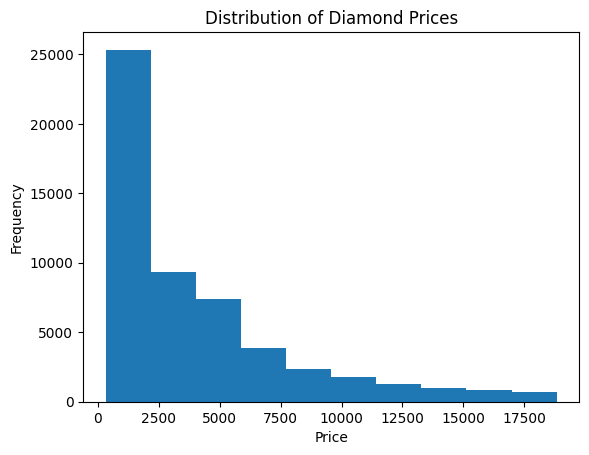


 The median is lower than the mean showing that the price distribution is right-skewed.
This means that a small number of very expensive diamonds increase the average price
2. CARAT CORRELATION TO PRICE: 

Correlation between Carat and Price: 0.922


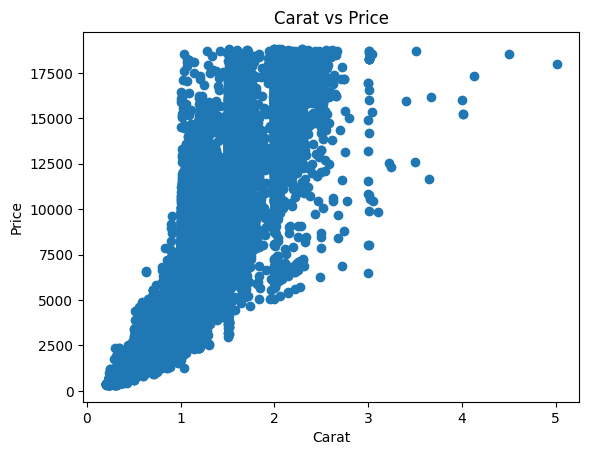

There is a strong positive correlation between carat and price. As the carat increases, price also significantly goes up.The scatterplot shows this. 

3. QUALITY DISTRIBUTION: 

The most common cut: Ideal
The most common color: G
The most common clarity: SI1


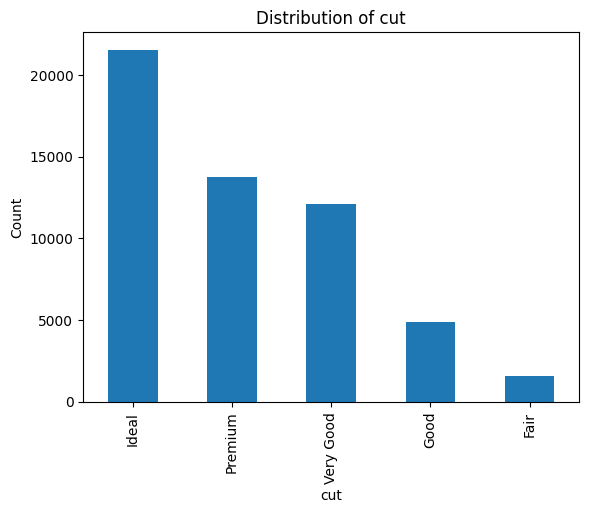

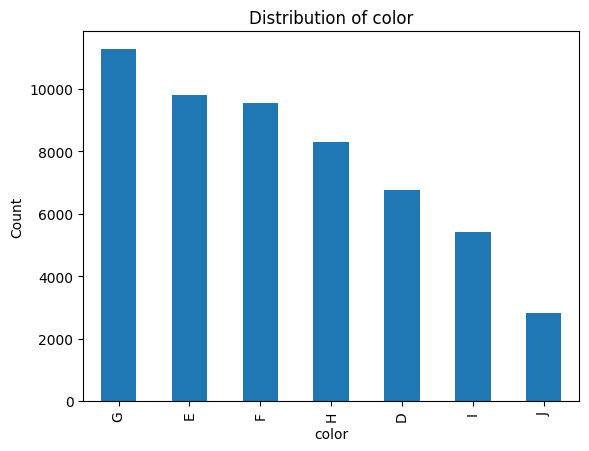

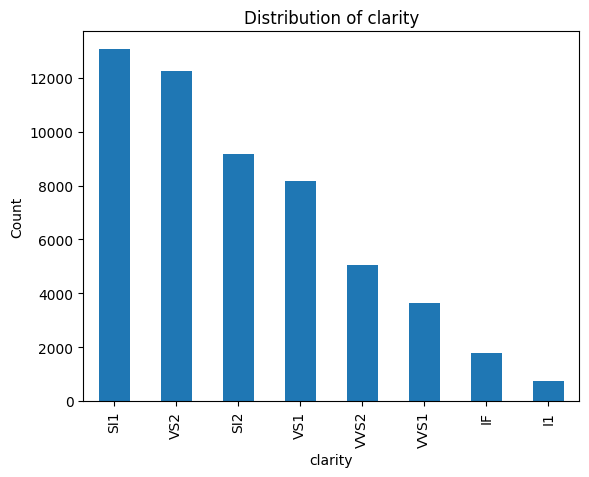


 The quality distribution shows that the dataset contains more mid-range diamonds than premium grades.
This means the dataset may not be evenly balanced across quality levels.


In [9]:
#EXPLORATORY DATA ANALYSIS
print("EXPLORATORY DATA ANALYSIS\n")
#Obtain overview
print("1.OVERVIEW: \n")
print("Shape of Dataset(rows/colums): \n")
print(df.shape)

print("Statistical Summary: \n")
print(df.describe)

print("Datatypes and Missing Values: \n")
print(df.info)

print("Missing Values: \n")
print(df.isna().sum())

#Obtain 3 insights
#Insight 1 calculations and graph
print("3 insights from the data include: \n")
print("1. PRICE DISTRIBUTION \n")
print(f"The average price of a diamond is: ${df['price'].mean():.2f}")
print(f"The median price of a diamond is: ${df['price'].median():.2f}")
print(f"The price range for the diamonds is: ${df['price'].min():.2f} - ${df['price'].max():.2f}")
plt.hist(df['price'])
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
#Insight 1 final comments
print("\n The median is lower than the mean showing that the price distribution is right-skewed.")
print("This means that a small number of very expensive diamonds increase the average price")

#Insight 2
print("2. CARAT CORRELATION TO PRICE: \n")
correlation = df['carat'].corr(df['price'])
print(f"Correlation between Carat and Price: {correlation:.3f}")
plt.figure()
plt.scatter(df['carat'], df['price'])
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()
#Insight 2 final comments
print("There is a strong positive correlation between carat and price. As the carat increases, price also significantly goes up.The scatterplot shows this. \n")

#Insight 3
print("3. QUALITY DISTRIBUTION: \n")
print(f"The most common cut: {df['cut'].mode()[0]}")
print(f"The most common color: {df['color'].mode()[0]}")
print(f"The most common clarity: {df['clarity'].mode()[0]}")
for col in ['cut', 'color', 'clarity']:
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

print("\n The quality distribution shows that the dataset contains more mid-range diamonds than premium grades.")
print("This means the dataset may not be evenly balanced across quality levels.")


(c) Create a sample of randomly selected 12500 records for modelling

In [10]:
diamonds_model = df.sample(n=12500, random_state=42)
diamonds_model.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
34704,0.31,Premium,F,IF,60.8,59.0,874,4.36,4.39,2.66
21099,1.29,Ideal,H,VS1,61.8,56.0,9273,6.97,7.02,4.32
23685,1.52,Premium,F,SI1,62.6,59.0,11743,7.36,7.27,4.58
39200,0.41,Good,F,VVS2,63.6,56.0,1064,4.72,4.68,2.99
35560,0.35,Premium,G,VS1,61.5,58.0,906,4.54,4.50,2.78


Question Three: Use linear regression algorithm to determine the price of diamonds given other features

In [15]:
#Select features X and target Y
#X represents all other features
#Y represents price(which we want to predict)
X = diamonds_model.drop('price', axis=1)
y = diamonds_model['price']

#Separate the columns
#Categorical - List of columns with categories(need encoding)
#Numerical - Numeric columns to be scaled
categorical = ['cut', 'color', 'clarity']
numerical = ['carat', 'depth', 'table', 'x', 'y', 'z']

#Preprocessing; scale numerical data, One-Hot encode categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(drop='first'), categorical)
    ]
)

#Create a pipeline to ensure application of preprocessing and Linear Regression
lr_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

#Split data for training and testing(80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
lr_model.fit(X_train, y_train)

# Use the trained model to make predictions on prices for test data
lr_predict = lr_model.predict(X_test)

# Evaluate the accuracy of the model(R² score and RMSE)
r2 = r2_score(y_test, lr_predict)
rmse = np.sqrt(mean_squared_error(y_test, lr_predict))

#Print out the results of the test
print("LINEAR REGRESSION TEST RESULTS: \n")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")


LINEAR REGRESSION TEST RESULTS: 

R² Score: 0.9274
RMSE: 1089.32


Question Four: Apply Principal Component Analysis (PCA) to select the 2 most suitable features

In [22]:
#Select the continuous variables
continuous_variables = ['carat', 'depth', 'table', 'x', 'y', 'z']
y = diamonds_model['price']

#Scale the continuous variables
scaler = StandardScaler()
scaled_values = scaler.fit_transform(diamonds_model[continuous_variables])

#Apply PCA to select the 2 most suitable features
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_values)

#Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(
    principal_components, y, test_size=0.2, random_state=42
)

#Train the model
pca_model = LinearRegression()
pca_model.fit(X_train, y_train)

#Predict the price using the model
pca_prediction = pca_model.predict(X_test)

#Evaluate the accuracy of the model
r2_pca = r2_score(y_test, pca_prediction)
rmse_pca = np.sqrt(mean_squared_error(y_test, pca_prediction))

print("PCA LINEAR REGRESSION TEST RESULTS ")
print(f"R² Score: {r2_pca:.4f}")
print(f"RMSE: {rmse_pca:.2f}")



PCA LINEAR REGRESSION TEST RESULTS 
R² Score: 0.8064
RMSE: 1778.34


Question Five: Fit 2 different regression models using Lasso
and Ridge regularisation techniques and validate accuracies

In [23]:
#LASSO MODEL
X = diamonds_model.drop('price', axis=1)
y = diamonds_model['price']

#Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Create a pipeline
lasso_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', Lasso(alpha=0.1))
])

#Train the model
lasso_model.fit(X_train, y_train)

#Use the model to make a price prediction
lasso_prediction = lasso_model.predict(X_test)

#Evaluate the model
r2_lasso = r2_score(y_test, lasso_prediction)
rmse_lasso = np.sqrt(mean_squared_error(y_test, lasso_prediction))

print("LASSO REGRESSION TEST RESULTS")
print(f"R² Score: {r2_lasso:.4f}")
print(f"RMSE: {rmse_lasso:.2f} \n")

#RIDGE REGRESSION MODEL
ridge_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)
ridge_prediction = ridge_model.predict(X_test)

r2_ridge = r2_score(y_test, ridge_prediction)
rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge_prediction))

print("RIDGE REGRESSION TEST RESULTS")
print(f"R² Score: {r2_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.2f}")

LASSO REGRESSION TEST RESULTS
R² Score: 0.9273
RMSE: 1089.58 

RIDGE REGRESSION TEST RESULTS
R² Score: 0.9273
RMSE: 1090.12


Question Six: Compare the 4 models

Linear Regression Model:
R² Score: 0.9274
RMSE: 1089.32

PCA Linear Regression Model:
R² Score: 0.8064
RMSE: 1778.34

Lasso Regression Model:
R² Score: 0.9273
RMSE: 1089.58

Ridge Regression Model:
R² Score: 0.9273
RMSE: 1090.12

From the scores presented, it is shown that Linear Regression has the highest accuracy, followed by Lasso, then Ridge and finally PCA Linear Regression with the lowest accuracy. It has the highest R² score (the higher it is the more accurate) and the lowest RMSE (the lower the more accurate), making it the most accurate option.